In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use('ggplot') #Trick to use nice plot
%matplotlib inline

### Create data

In [2]:
samples = 1000
data_seed = 42
np.random.seed(42)
classMeans = np.vstack([np.array([-1,1]),np.array([1,-1])])
classStd =[0.75,.5]
target = np.array([np.random.randint(0,2) for _ in range(samples)])
target[:10]
inputFeatures = np.array([
    classMeans[label,:] + np.random.randn(2)*classStd[label]
    for label in target]
)
df = pd.DataFrame({'x0':inputFeatures[:,0],
                  'x1':inputFeatures[:,1],
                  'target':np.array(['Positive','Negative'])[target]
                  })
df.head()

,x0,x1,target
0,-0.743683,2.407128,Positive
1,1.475212,-1.288452,Negative
2,-1.673811,1.368939,Positive
3,-1.990175,2.373594,Positive
4,-0.115420,0.648118,Positive


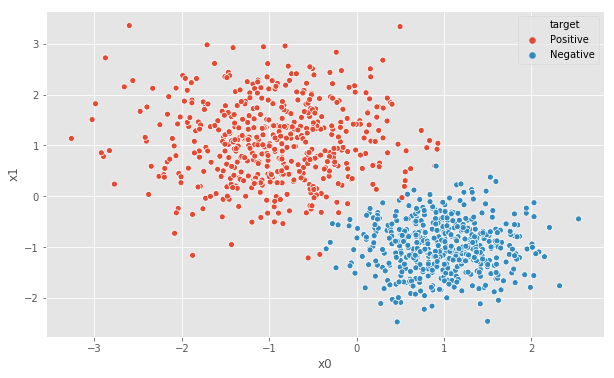

In [3]:
fig, ax = plt.subplots(1,figsize=(10,6))
_ = sns.scatterplot(x='x0',y='x1',hue='target',data=df,ax=ax)

In [4]:
def sigmoid(z):
    """Logistic Sigmoid"""
    return (np.exp(z*(-1.0))+1)**(-1)

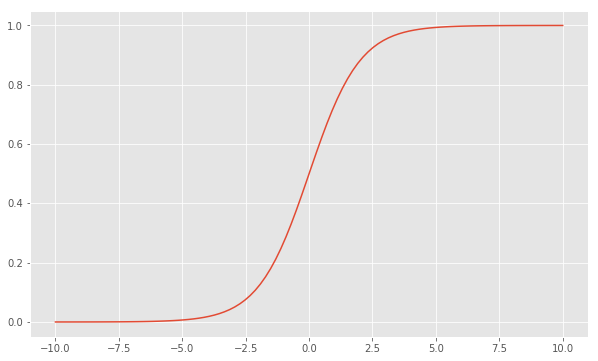

In [6]:
_, ax = plt.subplots(1,figsize=(10,6))
xaxis = np.linspace(-10,10,100)
_ = ax.plot(xaxis,sigmoid(xaxis))

In [9]:
seed = 56
np.random.seed(seed)
weights_0 = np.random.rand(2)
bias_0 = np.random.rand(1)

In [12]:
def predict(X,weights, bias):
    return sigmoid(np.dot(X,weights)+bias)

In [13]:
X = df[['x0','x1']]
df['p_prob'] = predict(X,weights_0,bias_0)
df['p_label'] = df['p_prob'] > 0.5

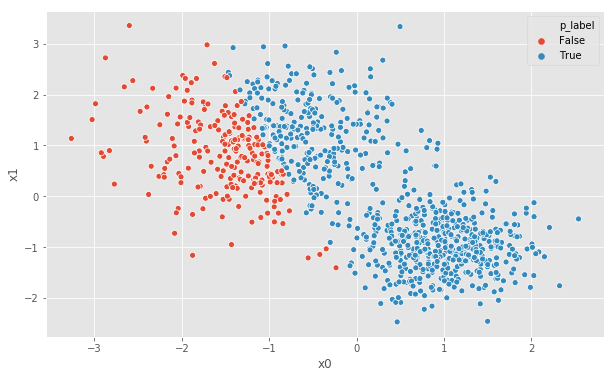

In [17]:
_, ax = plt.subplots(1,figsize=(10,6))
_ = sns.scatterplot(x='x0',y='x1',hue = 'p_label',ax = ax, data=df)

#This is not optimal because we picked everything randomly

In [24]:
lab_table = np.array([['TN','FP'],['FN','TP']])
df['confused'] = np.array([
    lab_table[int(target=='Positive'),int(p_label)]
 for target,p_label in df[['target','p_label']].values   
])
df.head()

,x0,x1,target,p_prob,p_label,confused
0,-0.743683,2.407128,Positive,0.677944,True,TP
1,1.475212,-1.288452,Negative,0.845013,True,FP
2,-1.673811,1.368939,Positive,0.373501,False,FN
3,-1.990175,2.373594,Positive,0.379040,False,FN
4,-0.115420,0.648118,Positive,0.684860,True,TP


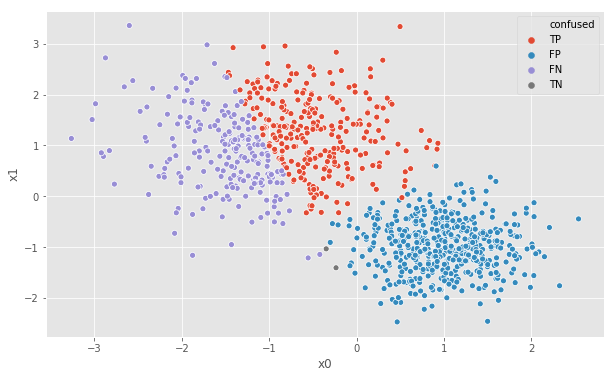

In [25]:
_, ax = plt.subplots(1,figsize=(10,6))
_ = sns.scatterplot(x='x0',y='x1',hue = 'confused',ax = ax, data=df)

In [43]:
#loss function: give large 'loss' when you have error in prediction
def cross_entropy_loss(y,y_pred):
    loss=np.zeros(y.shape[0])
    loss[y==1]= -np.log(y_pred[y==1])
    loss[y!=1] = -np.log(1-y_pred[y!=1])
    return loss.mean()

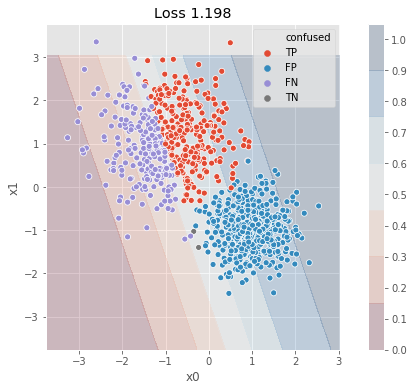

In [46]:
import matplotlib.colors as colors

y = (df['target']=='Positive').values

def show_classification(X,y,weights,bias):
    cm = plt.cm.RdBu
    bounds = np.arange(0,11) * 0.1 #Set up gradient
    norm = colors.BoundaryNorm(boundaries =bounds,ncolors=256)
    x_min, x_max = X.values[:,0].min() - .5, X.values[:,0].max() + .5
    y_min, y_max = X.values[:,1].min() - .5, X.values[:,1].max() + .5
    h = 0.2
    xx, yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(x_min,x_max,h))
    z = predict(np.c_[xx.ravel(),yy.ravel()],weights, bias)
    z = z.reshape(xx.shape)
    fig, ax = plt.subplots(1,figsize=(10,6))
    pcm = ax.contourf(xx,yy,z,norm=norm,cmap=cm,alpha=0.2)
    df['p_prob'] = predict(X,weights,bias)
    df['p_label'] = df['p_prob'] > 0.5
    df['confused'] = np.array([
    lab_table[int(target=='Positive'),int(p_label)]
     for target,p_label in df[['target','p_label']].values   
    ])
    loss = cross_entropy_loss(y,df['p_prob'])
    _ = sns.scatterplot(x='x0',y='x1',hue = 'confused',ax = ax, data=df) 
    ax.set_title("Loss {:03.3f}".format(loss))
    fig.colorbar(pcm,ax=ax,ticks=bounds)
    ax.legend()
    ax.set_aspect('equal')
    plt.show()
    return fig,ax
    
_ = show_classification(X,df['target'],weights_0,bias_0)

In [47]:
#Gradient: see his notebook